In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

In [2]:
dataset = pd.read_csv('final_dataset.csv')

In [3]:
dataset

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,6835,13/05/18,Newcastle,Chelsea,3,0,H,36,62,47,...,0,0,1,0,0,0,-0.289474,0.710526,-0.763158,-0.263158
6836,6836,13/05/18,Southampton,Man City,0,1,NH,37,105,55,...,0,0,1,0,0,0,-0.473684,2.052632,-1.605263,-0.131579
6837,6837,13/05/18,Swansea,Stoke,1,2,NH,27,33,54,...,0,0,0,0,0,0,-0.710526,-0.894737,0.078947,-0.052632
6838,6838,13/05/18,Tottenham,Leicester,5,4,H,69,52,32,...,0,0,0,0,0,0,0.973684,-0.078947,0.710526,0.078947


In [4]:
grouped = dataset.groupby(['HomeTeam', 'AwayTeam'])

# grouped.apply(print)
grouped.describe()

Unnamed: 0                                             \
                          count         mean          std     min      25%   
HomeTeam AwayTeam                                                            
Arsenal  Aston Villa       16.0  3029.625000  1868.459504    79.0  1490.50   
         Birmingham         7.0  2304.285714  1135.398860   767.0  1578.50   
         Blackburn         11.0  2443.454545  1320.638434   460.0  1419.50   
         Blackpool          1.0  3810.000000          NaN  3810.0  3810.00   
         Bolton            11.0  2423.545455  1259.472617   429.0  1494.50   
...                         ...          ...          ...     ...      ...   
Wolves   Swansea            1.0  4263.000000          NaN  4263.0  4263.00   
         Tottenham          4.0  3372.500000  1257.249246  1519.0  3133.00   
         West Brom          2.0  4293.000000   192.333044  4157.0  4225.00   
         West Ham           2.0  3651.500000   317.490945  3427.0  3539.25   
         Wigan              3.0  3963.666667   331.732322  3625.0  3801.50   

                                               FTHG            ...   DiffPts  \
                         50%      75%     max count      mean  ...       75%   
HomeTeam AwayTeam                                              ...             
Arsenal  Aston Villa  3043.5  4557.00  6070.0  16.0  2.375000  ...  0.822222   
         Birmingham   1971.0  3182.50  3870.0   7.0  1.714286  ...  1.100000   
         Blackburn    2459.0  3405.00  4410.0  11.0  3.272727  ...  1.050000   
         Blackpool    3810.0  3810.00  3810.0   1.0  6.000000  ... -1.000000   
         Bolton       2605.0  3433.50  4229.0  11.0  2.181818  ...  0.988095   
...                      ...      ...     ...   ...       ...  ...       ...   
Wolves   Swansea      4263.0  4263.00  4263.0   1.0  2.000000  ... -0.111111   
         Tottenham    3878.0  4117.50  4215.0   4.0  1.000000  ...  0.072368   
         West Brom    4293.0  4361.00  4429.0   2.0  2.000000  ... -0.212500   
         West Ham     3651.5  3763.75  3876.0   2.0  0.500000  ...  0.000000   
         Wigan        3978.0  4133.00  4288.0   3.0  1.333333  ...  0.108586   

                               DiffFormPts                                \
                           max       count      mean       std       min   
HomeTeam AwayTeam                                                          
Arsenal  Aston Villa  1.666667        16.0  0.286139  0.442780 -0.125000   
         Birmingham   1.333333         7.0  0.309864  0.268743  0.000000   
         Blackburn    1.666667        11.0  0.352797  0.518415 -0.125000   
         Blackpool   -1.000000         1.0 -1.000000       NaN -1.000000   
         Bolton       1.888889        11.0  0.315257  0.464167 -0.600000   
...                        ...         ...       ...       ...       ...   
Wolves   Swansea     -0.111111         1.0 -0.666667       NaN -0.666667   
         Tottenham    1.000000         4.0  0.234259  0.516044 -0.103448   
         West Brom   -0.200000         2.0 -0.111111  0.157135 -0.222222   
         West Ham     0.000000         2.0 -0.250000  0.353553 -0.500000   
         Wigan        0.272727         3.0  0.064695  0.023047  0.047619   

                                                              
                           25%       50%       75%       max  
HomeTeam AwayTeam                                             
Arsenal  Aston Villa  0.000000  0.185185  0.367316  1.666667  
         Birmingham   0.090476  0.238095  0.562500  0.625000  
         Blackburn    0.038462  0.153846  0.466667  1.666667  
         Blackpool   -1.000000 -1.000000 -1.000000 -1.000000  
         Bolton       0.075000  0.285714  0.550000  1.111111  
...                        ...       ...       ...       ...  
Wolves   Swansea     -0.666667 -0.666667 -0.666667 -0.666667  
         Tottenham   -0.054708  0.020243  0.309211  1.000000  
         West Brom   -0.166667 -0.111111 -0.05555

In [5]:
dataset.keys()

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts'],
      dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_2064\687975397.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot= True)


<Axes: >

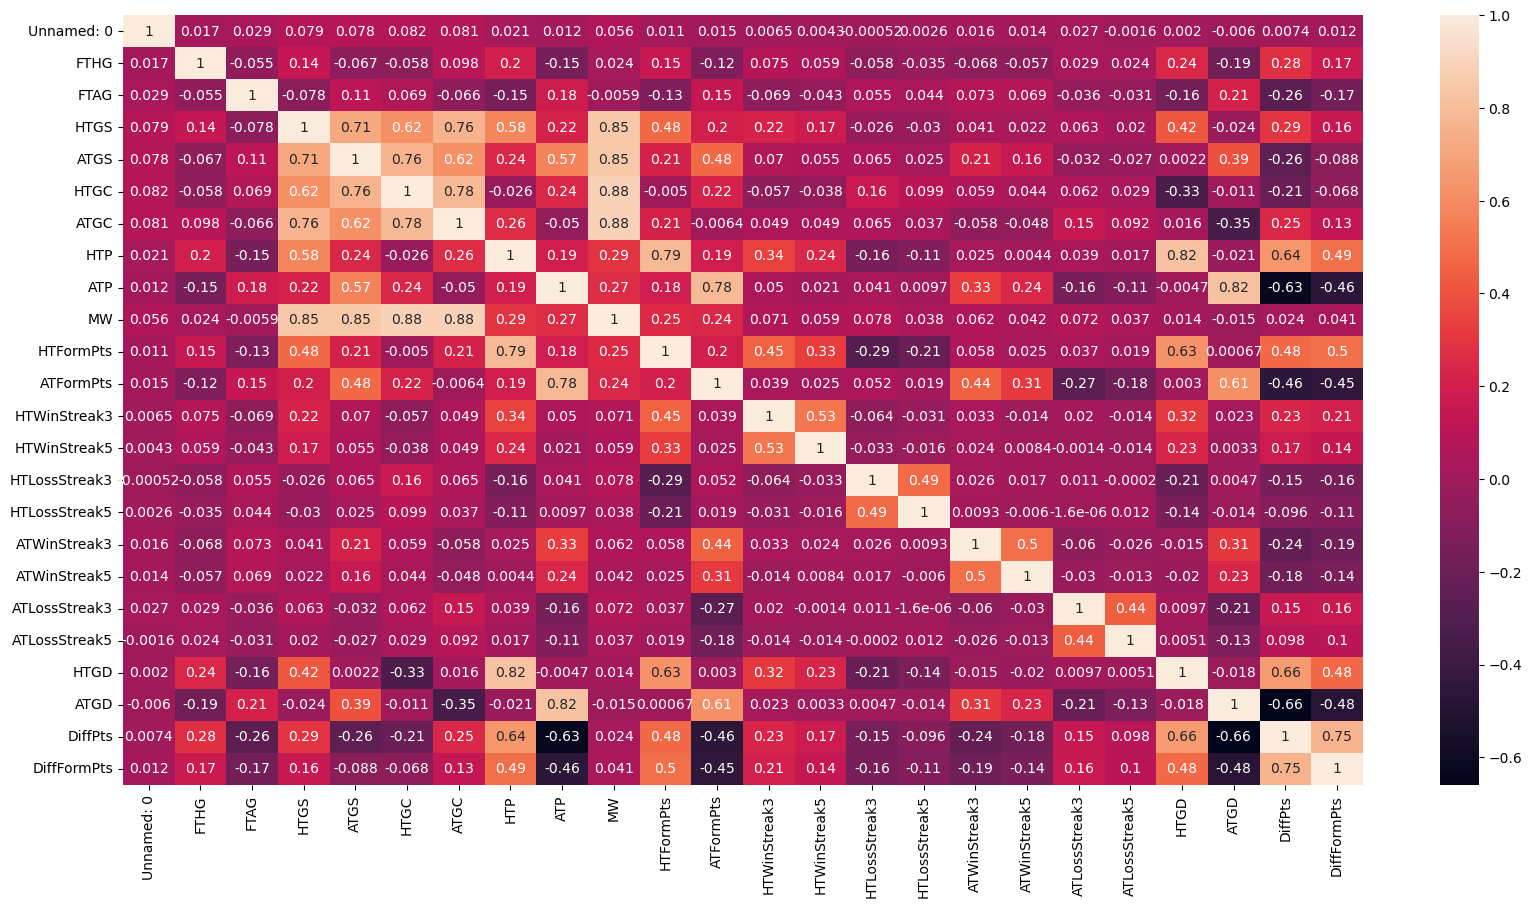

In [6]:
plt.figure(figsize=(20,10)) 
sns.heatmap(dataset.corr(), annot= True)

In [7]:
# Remove few column
dataset2 = dataset.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )

In [8]:
dataset2.keys()

Index(['Unnamed: 0', 'FTR', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2',
       'AM3', 'HTGD', 'ATGD', 'DiffFormPts'],
      dtype='object')

In [9]:
dataset2.head(10)

,Unnamed: 0,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
0,0,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
1,1,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
2,2,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
3,3,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
4,4,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
5,5,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
6,6,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
7,7,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
8,8,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
9,9,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0


In [10]:
#what is the win rate for the home team?

# Total number of matches.
n_matches = dataset2.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = dataset2.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(dataset2[dataset2.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print( "Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 6840
Number of features: 12
Number of matches won by home team: 3176
Win rate of home team: 46.43%


array([[<Axes: xlabel='HTGD', ylabel='HTGD'>,
        <Axes: xlabel='ATGD', ylabel='HTGD'>,
        <Axes: xlabel='HTP', ylabel='HTGD'>,
        <Axes: xlabel='ATP', ylabel='HTGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTGD'>],
       [<Axes: xlabel='HTGD', ylabel='ATGD'>,
        <Axes: xlabel='ATGD', ylabel='ATGD'>,
        <Axes: xlabel='HTP', ylabel='ATGD'>,
        <Axes: xlabel='ATP', ylabel='ATGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATGD'>],
       [<Axes: xlabel='HTGD', ylabel='HTP'>,
        <Axes: xlabel='ATGD', ylabel='HTP'>,
        <Axes: xlabel='HTP', ylabel='HTP'>,
        <Axes: xlabel='ATP', ylabel='HTP'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTP'>],
       [<Axes: xlabel='HTGD', ylabel='ATP'>,
        <Axes: xlabel='ATGD', ylabel='ATP'>,
        <Axes: xlabel='HTP', ylabel='ATP'>,
        <Axes: xlabel='ATP', ylabel='ATP'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATP'>],
       [<Axes: xlabel='HTGD', ylabel='DiffFormPts'>,
        <Axes

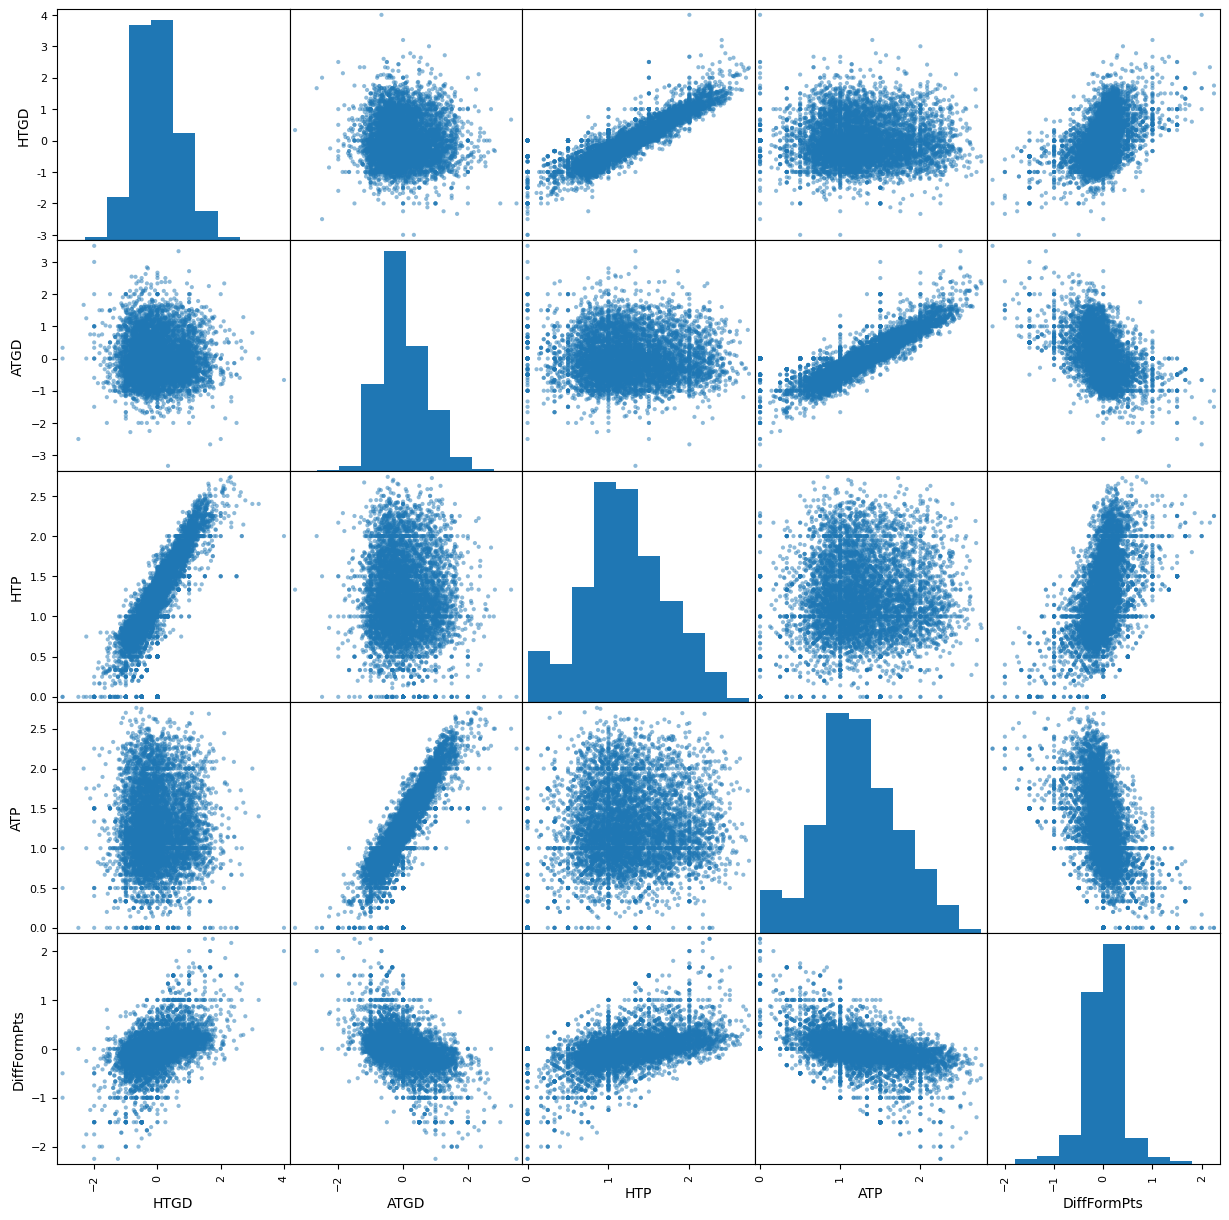

In [11]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

scatter_matrix(dataset2[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(15,15))

In [12]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = dataset2.drop(['FTR'],1)
y_all = dataset2['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])

C:\Users\HP\AppData\Local\Temp\ipykernel_2064\1781447627.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_all = dataset2.drop(['FTR'],1)


In [13]:
#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (30 total features):
['Unnamed: 0', 'HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts']


C:\Users\HP\AppData\Local\Temp\ipykernel_2064\1368799336.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, col_data in X.iteritems():


In [23]:
X_all.head(10)

,Unnamed: 0,HTP,ATP,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,HM2_L,HM2_M,...,AM2_L,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W,HTGD,ATGD,DiffFormPts
0,0,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
1,1,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
2,2,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
3,3,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
4,4,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
5,5,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
6,6,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
7,7,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
8,8,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
9,9,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0


In [15]:
dataset2.drop(['FTR'],1)

C:\Users\HP\AppData\Local\Temp\ipykernel_2064\2876911720.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset2.drop(['FTR'],1)


,Unnamed: 0,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
0,0,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
1,1,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
2,2,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
3,3,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
4,4,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
6835,6835,1.078947,1.842105,L,L,L,D,W,W,-0.289474,0.710526,-0.263158
6836,6836,0.947368,2.552632,W,D,W,W,D,W,-0.473684,2.052632,-0.131579
6837,6837,0.868421,0.789474,L,L,L,L,D,D,-0.710526,-0.894737,-0.052632
6838,6838,1.947368,1.236842,W,L,W,W,L,L,0.973684,-0.078947,0.078947


In [16]:
# dataset2.drop(['FTR'],1)
dataset3 = dataset.copy().drop(columns =['FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )
dataset3

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
0,0,19/08/00,Charlton,Man City,H,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
1,1,19/08/00,Chelsea,West Ham,H,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
2,2,19/08/00,Coventry,Middlesbrough,NH,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
3,3,19/08/00,Derby,Southampton,NH,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
4,4,19/08/00,Leeds,Everton,H,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,6835,13/05/18,Newcastle,Chelsea,H,1.078947,1.842105,L,L,L,D,W,W,-0.289474,0.710526,-0.263158
6836,6836,13/05/18,Southampton,Man City,NH,0.947368,2.552632,W,D,W,W,D,W,-0.473684,2.052632,-0.131579
6837,6837,13/05/18,Swansea,Stoke,NH,0.868421,0.789474,L,L,L,L,D,D,-0.710526,-0.894737,-0.052632
6838,6838,13/05/18,Tottenham,Leicester,H,1.947368,1.236842,W,L,W,W,L,L,0.973684,-0.078947,0.078947


In [17]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.3,
                                                    random_state = 2,
                                                    stratify = y_all)

In [18]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [21]:
Y_pred = classifier.predict(X_test.iloc[[0]])
print(Y_pred)

['NH']


In [20]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

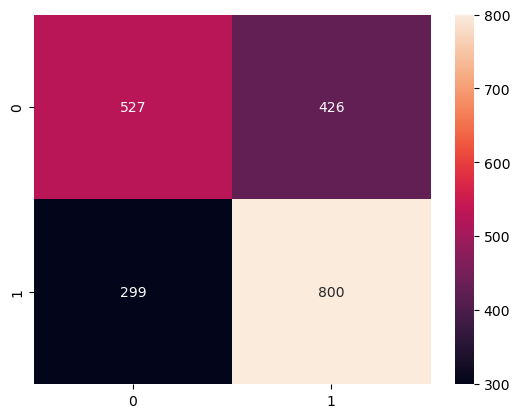

In [21]:
sns.heatmap(cm, annot=True,fmt='d')

In [22]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.64      0.55      0.59       953
          NH       0.65      0.73      0.69      1099

    accuracy                           0.65      2052
   macro avg       0.65      0.64      0.64      2052
weighted avg       0.65      0.65      0.64      2052



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
Y_pred = knn.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.47      0.47      0.47       953
          NH       0.54      0.55      0.55      1099

    accuracy                           0.51      2052
   macro avg       0.51      0.51      0.51      2052
weighted avg       0.51      0.51      0.51      2052



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
Y_pred = dt.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.53      0.53      0.53       953
          NH       0.59      0.59      0.59      1099

    accuracy                           0.56      2052
   macro avg       0.56      0.56      0.56      2052
weighted avg       0.56      0.56      0.56      2052



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(random_state=0)
classifier.fit(X_train, y_train)
Y_pred = classifier.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.64      0.52      0.58       953
          NH       0.64      0.74      0.69      1099

    accuracy                           0.64      2052
   macro avg       0.64      0.63      0.63      2052
weighted avg       0.64      0.64      0.64      2052



In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
Y_pred = classifier.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.60      0.65      0.62       953
          NH       0.67      0.63      0.65      1099

    accuracy                           0.64      2052
   macro avg       0.64      0.64      0.64      2052
weighted avg       0.64      0.64      0.64      2052



In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, penalty='l2')  # You can try 'l1' as well
classifier.fit(X_train, y_train)
Y_pred = classifier.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.64      0.55      0.59       953
          NH       0.65      0.73      0.69      1099

    accuracy                           0.65      2052
   macro avg       0.65      0.64      0.64      2052
weighted avg       0.65      0.65      0.64      2052



In [23]:
def make_pred(X_train):
    
    pred = classifier.predict(X_train)
    return pred

## Flask App

In [28]:
! pip install flask flask_wtf pandas sqlalchemy
! pip install WTForms


In [27]:
from flask_wtf import FlaskForm
from wtforms import StringField, SubmitField, FloatField
from flask import Flask, render_template, redirect, url_for
from flask_wtf.csrf import CSRFProtect
import pandas as pd


from flask import Flask, render_template, request, redirect, url_for, session
from flask_sqlalchemy import SQLAlchemy
from datetime import datetime

app = Flask(__name__)
csrf = CSRFProtect(app)

app = Flask(__name__)
app.secret_key = 'your_secret_key' 
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///users.db'
db = SQLAlchemy(app)

team_codes = {
    'charlton': 0, # 
    'chelsea': 1, #
    'coventry': 2, #
    'derby': 3, 
    'leeds': 4,
    'leicester': 5, #
    'liverpool': 6, #
    'sunderland': 7,
    'tottenham': 8, #
    'man united': 9, #
    'arsenal': 10, #
    'bradford': 11,
    'ipswich': 12,
    'middlesbrough': 13,
    'everton': 14, #
    'man city': 15, #
    'newcastle': 16, #
    'southampton': 17, #
    'west ham': 18, #
    'aston villa': 19, #
    'bolton': 20, 
    'blackburn': 21,
    'fulham': 22, #
    'birmingham': 23, #
    'middlesboro': 24, #
    'west brom': 25,
    'portsmouth': 26,
    'wolves': 27, #
    'norwich': 28,
    'crystal palace': 29, #
    'wigan': 30,
    'reading': 31,
    'sheffield united': 32,
    'watford': 33, #
    'hull': 34,
    'stoke': 35,
    'burnley': 36, #
    'blackpool': 37,
    'qpr': 38,
    'swansea': 39,
    'cardiff': 40, #
    'bournemouth': 41, #
    'brighton': 42,
    'huddersfield': 43
}


class MyForm(FlaskForm):
    data1 = FloatField('Data 1')
    data2 = FloatField('Data 2')
    data3 = StringField('Data 3')
    data4 = StringField('Data 4')
    data5 = StringField('Data 5')
    data6 = StringField('Data 6')
    data7 = StringField('Data 7')
    data8 = StringField('Data 8')
    data9 = FloatField('Data 9')
    data10 = FloatField('Data 10')
    data11 = FloatField('Data 11')
    pred = FloatField('pred')
    submit = SubmitField('Submit')


# Define the User model
class User(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    username = db.Column(db.String(80), unique=True, nullable=False)
    password = db.Column(db.String(120), nullable=False)
    email = db.Column(db.String(120), unique=True, nullable=False) 
    

class Comment(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    content = db.Column(db.Text, nullable=False)
    match_index = db.Column(db.Integer, nullable=False) 
    user_id = db.Column(db.Integer, db.ForeignKey('user.id'), nullable=False)
    user = db.relationship('User', backref=db.backref('comments', lazy=True))
    timestamp = db.Column(db.DateTime, nullable=False, default=datetime.utcnow)



dataset = None
dataset2 = None
matches = None
team_names = None
chosen_matches = []
chosen_data_matches = []
display_data = None
mi = None
players_by_team = {}


def make_pred(X_test):
    
    print(X_test)
    return X_test[0]+X_test[1]


def work():

    global dataset, dataset2, matches, players_by_team, display_data
    dataset = pd.read_csv('final_dataset.csv')

    dataset2 = dataset.copy().drop(columns =['FTR', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )
    
    display_data = dataset[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP',
       'HTFormPts', 'ATFormPts', 'HM1', 'AM1', 'HM2', 'AM2', 'HM3', 'AM3',
       'HTWinStreak3', 'ATWinStreak3', 'HTLossStreak3', 'ATLossStreak3',
       ]].copy()
        
    display_data = display_data.values.tolist()


    matches_df = dataset[['HomeTeam', 'AwayTeam']].copy()
    matches = [tuple(x) for x in matches_df.to_records(index=False)]
    

    df = pd.read_csv('Premier League Player Stats.csv')

    for index, row in df.iterrows():
        team = row['TEAM'].lower()
        player = row['PLAYER']
        
        if team in players_by_team:
            players_by_team[team].append(player)
        else:
            players_by_team[team] = [player]

    new_names = {'wolverhampton wanderers' : 'wolves', 'brighton and hove albion' : 'brighton', 'leicester city': 'leicester', 'manchester city': 'man city', 'tottenham hotspur':'tottenham', 'manchester united':'man united', 'norwich city':'norwich', 'west ham united': 'west ham', 'newcastle united':'newcastle'}
    
    players_by_team = {new_names.get(old_key, old_key): value for old_key, value in players_by_team.items()}


    players_by_team['birmingham'] = ["John Smith","Michael Johnson","Christopher Brown","Daniel Davis","David Martinez","Joseph Anderson","James Taylor","Robert Hernandez","William Gonzalez","Richard Wilson","Thomas Moore","Matthew Miller"]
    players_by_team['blackburn'] = ["Benjamin Thompson","Lucas Rodriguez","Nathan Wright","Samuel Martinez","Oliver Harris","Alexander Nelson","William Carter","Henry Mitchell","Ethan Lopez","Daniel Taylor","James Scott","Jacob King"]
    players_by_team['blackpool'] = ["Michael Johnson", "David Anderson", "Christopher Martinez","Matthew Turner", "Joseph Wilson", "Andrew Garcia","Daniel Lee", "Ryan Rodriguez", "Tyler Hernandez","John Smith", "Robert Brown", "Joshua Jones"]
    players_by_team['bolton'] = [ "Kevin Thompson", "Brian Harris", "Anthony Martinez", "Justin Clark", "Steven Adams", "Brandon Lewis", "Eric Hall", "Adam White", "James Robinson", "Thomas Moore", "William Taylor", "Charles Jackson"]
    players_by_team['bradford'] = ["Michael Johnson", "Christopher Brown", "Matthew Davis", "Daniel Miller", "Mark Wilson", "Richard Garcia", "Joseph Rodriguez", "David Martinez", "Anthony Hernandez", "Paul Lopez", "Andrew Gonzalez", "Joshua Young"]
    players_by_team['cardiff'] = ["Jason Thompson", "Brian Lewis", "Kevin Scott", "Justin Green", "Brandon Hall", "Eric King", "Steven White", "Adam Adams", "Ryan Harris", "Thomas Clark", "Jeffrey Baker", "Gary Turner"]
    players_by_team['charlton'] = ["Christopher Martinez", "Matthew Robinson", "Anthony Wright", "Daniel Lopez", "Kenneth Lee", "George Walker", "Ronald Perez", "Edward Hall", "James Gonzalez", "Timothy Young", "Joshua Martinez", "Michael Rodriguez"]
    players_by_team['coventry'] = ["Brian Foster", "Thomas Martinez", "David Scott", "Steven Nelson", "Charles King", "Joseph Harris", "Paul Wright", "Mark Martinez", "Donald Miller", "Jason Rodriguez", "Jeffrey Clark", "Kevin Lewis"]
    players_by_team['derby'] = ["Robert Johnson", "Michael Brown", "William Davis", "Richard Wilson", "James Taylor", "John Anderson", "Thomas Thomas", "Daniel Jackson", "Matthew White", "Christopher Harris", "Joseph Martin", "David Thompson"]
    players_by_team['fulham'] = ["Andrew Clark", "Ryan Martinez", "Kevin Lewis", "Jeffrey Lee", "Brian Walker", "Timothy Hall", "Jason Young", "Eric Allen", "Steven Hernandez", "Scott King", "Justin Wright", "Brandon Hill"]
    players_by_team['huddersfield'] = ["Christopher Martinez", "Matthew Lopez", "Daniel Taylor", "James Martinez", "David Thomas", "Brian Garcia", "Jose Rodriguez", "William Hernandez", "Anthony Martinez", "Michael Rodriguez", "Charles Martinez", "Joseph Rodriguez"]
    players_by_team['hull'] = ['Jessica Green', 'Michael Scott', 'Emily Johnson', 'Justin White', 'Megan Lee', 'Kevin Martinez', 'Rachel Davis', 'Tyler Wilson', 'Olivia Thompson', 'Daniel Harris', 'Lauren Turner', 'Matthew Clark']
    players_by_team['ipswich'] = ['Sarah Adams', 'Ryan Parker', 'Amanda Miller', 'Brandon Mitchell', 'Jennifer Taylor', 'Christopher Brown', 'Stephanie Anderson', 'Andrew Martinez', 'Elizabeth Thomas', 'David Garcia', 'Rebecca Rodriguez', 'John Jackson']
    players_by_team['leeds'] = ['Michael Wilson', 'Jessica Lee', 'Matthew Harris', 'Lauren Martinez', 'Daniel Thompson', 'Ashley Clark', 'Christopher Walker', 'Emily Rodriguez', 'Joshua White', 'Michelle Scott', 'Nicholas Lewis', 'Sarah Hall']
    players_by_team['middlesboro'] = ['Alexis Johnson', 'Brandon Taylor', 'Olivia Thomas', 'Jacob Moore', 'Ava Garcia', 'Ethan Martinez', 'Sophia Anderson', 'William Brown', 'Mia Wilson', 'James Davis', 'Charlotte Miller', 'Daniel Rodriguez']
    players_by_team['middlesbrough'] = ['Elijah Clark', 'Amelia Young', 'Michael Scott', 'Emily White', 'Ryan Lewis', 'Avery King', 'Lucas Turner', 'Madison Hill', 'Logan Adams', 'Harper Carter', 'Jackson Wright', 'Evelyn Lopez']
    players_by_team['portsmouth'] = ['Emma Martinez', 'William Johnson', 'Olivia Brown', 'James Wilson', 'Isabella Anderson', 'Daniel Thompson', 'Sophia Harris', 'Alexander Davis', 'Mia Rodriguez', 'Benjamin Martinez', 'Charlotte Taylor', 'Jacob Garcia']
    players_by_team['qpr'] = ['Liam Smith', 'Emma Johnson', 'Noah Williams', 'Olivia Brown', 'William Jones', 'Ava Davis', 'James Wilson', 'Sophia Miller', 'Alexander Taylor', 'Isabella Moore', 'Ethan Anderson', 'Charlotte White']
    players_by_team['reading'] = ['Oliver Martinez', 'Sophia Taylor', 'Liam Johnson', 'Emma Brown', 'Noah Garcia', 'Olivia Rodriguez', 'William Hernandez', 'Ava Martinez', 'James Lopez', 'Isabella Perez', 'Ethan Gonzalez', 'Charlotte Moore']
    players_by_team['stoke'] = ['Elijah Anderson', 'Amelia Martinez', 'James Johnson', 'Olivia Brown', 'William Garcia', 'Charlotte Wilson', 'Michael Rodriguez', 'Ava Hernandez', 'Alexander Lopez', 'Sophia Perez', 'Daniel Gonzalez', 'Mia Moore']
    players_by_team['sunderland'] = ['Liam Taylor', 'Emma Thomas', 'Noah White', 'Olivia Harris', 'William Clark', 'Ava Lewis', 'James Turner', 'Isabella Baker', 'Logan Hall', 'Sophia Wright', 'Benjamin Hill', 'Emily Parker']
    players_by_team['swansea'] = ['Jacob Johnson', 'Sophia Martinez', 'Mason Anderson', 'Ava Taylor', 'William Jackson', 'Isabella Thompson', 'James Harris', 'Olivia Nelson', 'Benjamin White', 'Charlotte Martinez', 'Elijah Robinson', 'Amelia Lewis']
    players_by_team['westborn'] = ['Liam Brown', 'Emma Rodriguez', 'Noah Garcia', 'Olivia Martinez', 'William Lopez', 'Ava Wilson', 'James Martinez', 'Isabella Robinson', 'Oliver Clark', 'Sophia Walker', 'Benjamin Young', 'Mia Hernandez']
    players_by_team['wigan'] = ['Ethan Taylor', 'Amelia Lewis', 'Michael White', 'Sophia Thompson', 'Alexander Hall', 'Ava Garcia', 'William Martin', 'Olivia Martinez', 'James Robinson', 'Isabella Johnson', 'Benjamin Brown', 'Mia Davis']


work()


@app.route('/home')
def home():
    global chosen_matches, display_data, chosen_data_matches

    match_data = [(index, match) for index, match in enumerate(matches[:5])]
    chosen_matches = match_data
    chosen_data_matches = display_data[:5]

    return render_template('index.html', match_data=match_data)

# Create the database tables within application context
with app.app_context():
    db.create_all()

@app.route('/')
def index():
    global chosen_matches, chosen_data_matches, display_data

    if 'username' in session:
        # comments = Comment.query.order_by(Comment.timestamp.desc()).all()
        # return render_template('index.html', comments=comments)

        match_data = [(index, match) for index, match in enumerate(matches[:5])]
        chosen_matches = match_data

        chosen_data_matches = display_data[:5]

        return render_template('index.html', match_data=match_data)
    else:
        return redirect(url_for('login'))



@app.route('/add_comment/<int:match_index>', methods=['POST'])
def add_comment(match_index):
    if 'username' in session:
        content = request.form['content']
        user = User.query.filter_by(username=session['username']).first()
        if content:
            new_comment = Comment(content=content, user=user, match_index=match_index)
            db.session.add(new_comment)
            db.session.commit()
    
    return redirect(url_for('show_match_data', match_index=match_index))



@app.route('/register', methods=['GET', 'POST'])
def register():
    if request.method == 'POST':
        username = request.form['username']
        password = request.form['password']
        email = request.form['email']  
        if username and password and email: 
            # Check if the username already exists
            existing_user = User.query.filter_by(username=username).first()
            if existing_user:
                return render_template('register.html', error='Username already exists. Please choose a different username.')
            else:
                # Check if the email already exists
                existing_email = User.query.filter_by(email=email).first()
                if existing_email:
                    return render_template('register.html', error='Email already exists. Please choose a different email.')
                else:
                    # Create the new user
                    new_user = User(username=username, password=password, email=email)
                    db.session.add(new_user)
                    db.session.commit()
                    session['username'] = username
                    return redirect(url_for('index'))
    return render_template('register.html')


# Update login route
@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        username_or_email = request.form['username_or_email']  # Retrieve username or email from form
        password = request.form['password']
        # Check if the input is an email or username
        if '@' in username_or_email:
            user = User.query.filter_by(email=username_or_email).first()  # Check if email exists
        else:
            user = User.query.filter_by(username=username_or_email).first()  # Check if username exists
        
        if user and user.password == password:
            session['username'] = user.username
            return redirect(url_for('index'))
    return render_template('login.html')


@app.route('/logout')
def logout():
    session.pop('username', None)
    return redirect(url_for('login'))


@app.route('/match/<int:match_index>', methods=['GET', 'POST'])
def show_match_data(match_index):
    global chosen_data_matches

        
    dataset2_values = dataset2.values.tolist()[match_index]
    comments = Comment.query.filter_by(match_index=match_index).order_by(Comment.timestamp.desc()).all()
    form = MyForm()

    if form.validate_on_submit():

        X_train = [ (form.data1.data) ,  (form.data2.data) ,  (form.data3.data) ,  (form.data4.data) ,  (form.data5.data) ,  (form.data6.data) ,  (form.data7.data) ,  (form.data8.data) ,  (form.data9.data) ,  (form.data10.data) ,  (form.data11.data) ]
        pred = make_pred(X_train)

        return render_template('match_data2.html', pred=pred, dataset2_values=dataset2_values, form=form, comments=comments, match_index=match_index, players_by_team=players_by_team, display_data=chosen_data_matches[match_index])

    return render_template('match_data.html', dataset2_values=dataset2_values, form=form, comments=comments, match_index=match_index, players_by_team=players_by_team, display_data=chosen_data_matches[match_index])


@app.route('/clear_form', methods=['POST'])
def clear_form():
    global msg
    msg = 'New Data Fitted!'
    form = MyForm()
    if form.validate_on_submit():
        print(form.pred.data)
    print('\n\n', msg)
    return redirect(url_for('home'))

@app.route('/clear_form2', methods=['POST'])
def clear_form2():
    global msg
    msg = ''
    return redirect(url_for('home'))


if __name__ == '__main__':
    app.run(debug=True)


ModuleNotFoundError: No module named 'flask_sqlalchemy'